In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

Reading data:


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhythmia.data to arrhythmia.data


Converting to dataframe:

In [ ]:
data = pd.read_csv("arrhythmia.data", header=None, na_values='NaN')
data.shape
data.columns=range(1, 281) 

Choosing 1 and 2 classes only:

In [ ]:
ischemic=data[(data[280]==1) | (data[280]==2)]

In [ ]:
ischemic.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,40,1,160,52,77,129,377,133,77,77,49.0,75.0,65.0,NaN,70.0,0,44,0,0,0,24,0,0,0,0,0,0,0,40,32,0,0,24,0,0,0,0,0,0,0,...,0.0,3.7,-11.0,0.0,0.0,-0.5,4.1,-19.8,21.2,0.1,0.0,7.7,-6.4,0.0,0.0,0.4,1.9,1.4,15.4,0.0,0.0,7.4,-2.5,0.0,0.0,0.4,1.3,9.3,18.9,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,7.0,8.0,51.0,NaN,67.0,0,44,36,0,0,24,0,0,0,0,0,0,0,52,32,0,0,28,0,0,0,0,0,0,0,...,0.0,2.1,-9.0,0.0,0.0,0.6,3.8,-16.1,21.1,0.1,0.0,6.6,-4.1,0.0,0.0,0.3,1.4,4.7,14.2,-0.2,0.0,8.5,-2.7,0.0,0.0,0.1,0.8,14.5,20.9,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,69.0,78.0,66.0,84.0,64.0,0,40,0,0,0,20,0,0,0,0,0,0,0,44,12,0,0,28,0,0,0,0,0,0,0,...,0.0,2.4,-10.3,0.0,0.0,0.3,6.8,-19.3,43.2,0.8,0.0,7.9,-7.3,0.0,0.0,0.9,6.5,5.7,62.9,0.1,0.0,9.3,-3.8,0.0,0.0,0.8,3.8,15.1,48.5,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
11,45,1,165,86,77,143,373,150,65,12,37.0,49.0,26.0,NaN,72.0,0,40,28,0,0,20,0,0,0,0,0,0,0,40,20,0,0,20,0,0,0,0,0,0,32,...,0.0,6.5,-9.1,0.0,0.0,0.5,0.4,-8.8,-5.5,0.0,0.0,3.8,-5.6,0.0,0.0,0.5,0.3,-8.8,-6.4,0.0,0.0,4.8,-4.3,0.0,0.0,0.6,0.9,-1.5,5.7,0.1,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,1
14,44,1,160,88,77,158,399,163,94,46,20.0,45.0,40.0,NaN,72.0,0,80,0,0,0,28,0,0,0,0,0,0,20,72,0,0,0,44,0,0,0,0,0,0,24,...,0.0,8.3,-2.5,0.0,0.0,0.4,3.3,19.0,52.6,0.2,0.0,12.7,-1.1,0.0,0.0,0.3,1.9,29.8,47.2,0.2,-0.5,13.6,-0.4,0.0,0.0,0.2,1.9,29.3,46.4,0.1,-0.6,12.4,0.0,0.0,0.0,0.3,1.7,39.2,54.1,1
15,47,1,150,48,75,132,350,169,65,36,45.0,68.0,40.0,NaN,76.0,0,48,0,0,0,24,0,0,0,0,0,0,0,44,28,0,0,28,0,0,0,0,0,0,0,...,0.0,5.9,-3.3,0.0,0.0,0.6,7.0,10.8,107.4,0.1,0.0,9.6,-2.9,0.0,0.0,0.7,3.1,19.6,45.0,0.0,0.0,9.6,-1.6,0.0,0.0,0.7,2.6,20.2,41.5,0.0,0.0,7.7,-0.8,0.0,0.0,0.6,1.7,17.2,31.1,1
17,46,1,158,58,70,120,353,122,52,57,49.0,-2.0,54.0,NaN,70.0,0,48,0,0,0,24,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,0,...,0.0,1.7,-4.1,0.0,0.0,0.5,1.3,-6.3,11.3,-0.4,0.0,8.4,-2.9,0.0,0.0,0.4,0.9,14.3,20.2,-0.4,0.0,8.4,-1.8,0.0,0.0,0.3,0.5,16.9,19.6,-0.6,0.0,6.6,0.0,0.0,0.0,0.3,0.7,17.1,20.8,1
18,73,0,165,63,91,154,392,175,83,73,-24.0,61.0,42.0,NaN,66.0,0,44,56,0,0,20,0,0,0,0,0,0,0,84,0,0,0,28,0,0,0,0,0,0,16,...,0.0,5.0,-17.3,0.0,0.0,0.2,7.9,-34.9,50.4,0.1,0.0,11.0,-9.9,0.0,0.0,0.6,3.0,-1.5,26.7,-0.1,0.0,8.3,-1.5,0.0,0.0,0.5,1.1,16.0,25.9,-0.5,0.0,5.7,0.0,0.0,0.0,0.4,0.5,18.2,22.4,1
19,57,1,166,72,82,181,399,158,79,-12,28.0,50.0,1.0,NaN,66.0,0,56,16,0,0,28,0,0,0,0,0,0,0,64,32,0,0,44,0,0,0,0,0,0,0,...,0.0,14.4,-2.7,0.0,0.0,0.1,4.0,33.7,67.3,-0.6,0.0,18.8,-2.0,0.0,0.0,0.5,3.6,54.4,86.0,-0.5,0.0,9.5,-1.4,0.0,0.0,0.5,2.0,28.8,43.6,-0.3,0.0,7.7,-0.9,0.0,0.0,0.5,1.8,25.2,38.5,1


Splitting the data into training and test data:

In [ ]:
y=ischemic[280]
X=ischemic.drop(280, axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=0)

Define a function to measure the error:

In [ ]:
def score_dataset(y_test, x_test, pipeline):
  df_preds=pd.DataFrame((map(round, pipeline.predict(x_test))))
  y_test.index=range(0, len(y_test))
  df_reals=pd.DataFrame(y_test)
  df_reals=df_reals.values.tolist()
  df_preds=df_preds.values.tolist()
  count=0
  for i in range(len(df_preds)):
    if df_preds[i]==df_reals[i]:
      count+=1
  score=(count/len(y_test))*100
  return score

Let's see how model works based on different n_estimators parameter. We use score_dataset function for checking error in percentage.

In [ ]:
scores=['n_estimators', 'error in %']
df_score=pd.DataFrame(index=range(1, 201), columns=scores)
for i in range(1, 201):
  my_pipeline=Pipeline(steps=[('preprocessor', SimpleImputer(strategy='constant', fill_value=0.0)), ('model', RandomForestClassifier(n_estimators=i, random_state=0))])
  my_pipeline.fit(X_train, y_train)
  df_score.loc[i, 'n_estimators']=i
  df_score.loc[i, 'error in %']=score_dataset(y_test, X_test, my_pipeline)

In [ ]:
df_score

,n_estimators,error in %
1,1,81.8966
2,2,86.2069
3,3,87.069
4,4,84.4828
5,5,85.3448
...,...,...
196,196,91.3793
197,197,91.3793
198,198,91.3793
199,199,91.3793


In [ ]:
df_score['n_estimators']=df_score['n_estimators'].astype(int)
df_score['error in %']=df_score['error in %'].astype(float)

Text(0.5, 1.0, 'Dependense accuracy on n_estimators')

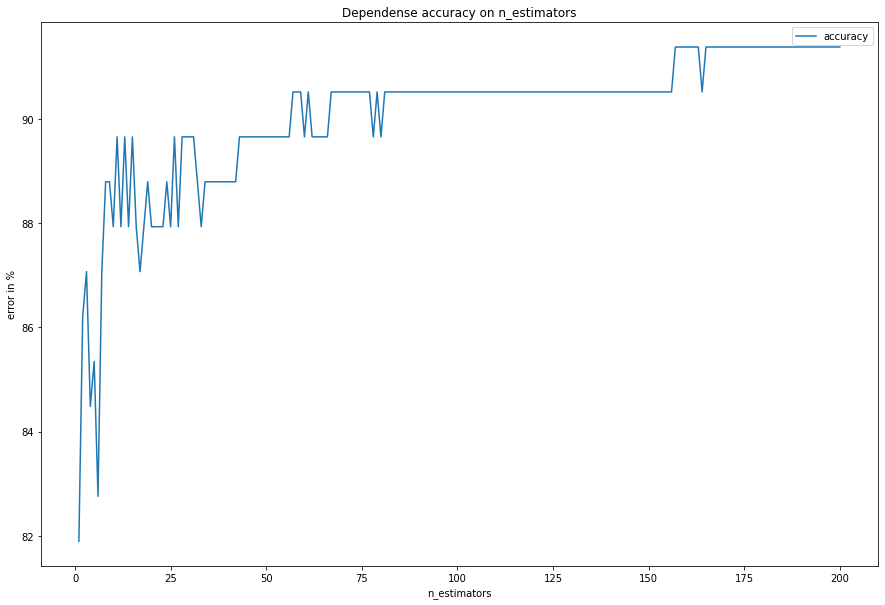

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df_score['n_estimators'], y=df_score['error in %'], label='accuracy')
plt.title('Dependense accuracy on n_estimators')

The best result was achieved with 150+ n_estimators. Significant increase of n_estimators didn't show better results, peak value is 91% with ~200 trees.

In [ ]:
scores=['n_estimators', 'error in %']
df_score=pd.DataFrame(index=range(1, 11), columns=scores)
for i in range(50, 1001, 50):
  my_pipeline=Pipeline(steps=[('preprocessor', SimpleImputer(strategy='constant', fill_value=0.0)), ('model', RandomForestClassifier(n_estimators=i, random_state=0))])
  my_pipeline.fit(X_train, y_train)
  df_score.loc[i/50, 'n_estimators']=i
  df_score.loc[i/50, 'error in %']=score_dataset(y_test, X_test, my_pipeline)
df_score['n_estimators']=df_score['n_estimators'].astype(int)
df_score['error in %']=df_score['error in %'].astype(float)

Text(0.5, 1.0, 'Dependense accuracy on n_estimators')

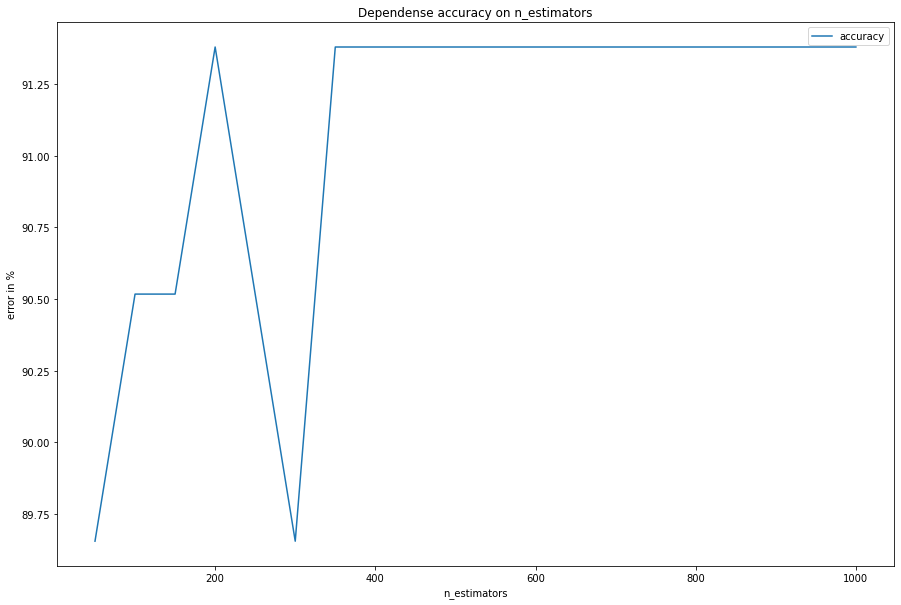

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df_score['n_estimators'], y=df_score['error in %'], label='accuracy')
plt.title('Dependense accuracy on n_estimators')